<a href="https://colab.research.google.com/github/Moussaoui-Ghiles/Colab-Projects/blob/main/INES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Download the Dataset

In [ ]:
# Create .kaggle directory
!mkdir -p ~/.kaggle

# Move kaggle.json to the right location
!cp kaggle.json ~/.kaggle/

# Set correct permissions
!chmod 600 ~/.kaggle/kaggle.json

# Verify the setup by listing available datasets
!kaggle competitions list

# Download the competition data
!kaggle competitions download -c llm-detect-ai-generated-text

# Create a data directory and unzip the files there
!mkdir -p data
!unzip llm-detect-ai-generated-text.zip -d data

# List the contents of the data directory
!ls -l data

ref                                                                              deadline             category                reward  teamCount  userHasEntered  
-------------------------------------------------------------------------------  -------------------  ---------------  -------------  ---------  --------------  
https://www.kaggle.com/competitions/ai-mathematical-olympiad-progress-prize-2    2025-04-01 23:59:00  Featured         2,117,152 Usd       1020           False  
https://www.kaggle.com/competitions/konwinski-prize                              2025-03-12 23:59:00  Featured         1,225,000 Usd        177           False  
https://www.kaggle.com/competitions/czii-cryo-et-object-identification           2025-02-05 23:59:00  Featured            75,000 Usd        707           False  
https://www.kaggle.com/competitions/equity-post-HCT-survival-predictions         2025-03-05 23:59:41  Research            50,000 Usd       1558           False  
https://www.kaggle.com/compe

# Data visualization and analyis

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


=== Dataset Size Analysis ===
Training set size: (1378, 4)
Test set size: (3, 3)
Number of prompts: 2

=== Class Distribution in Training Set ===
generated
0    0.997823
1    0.002177
Name: proportion, dtype: float64


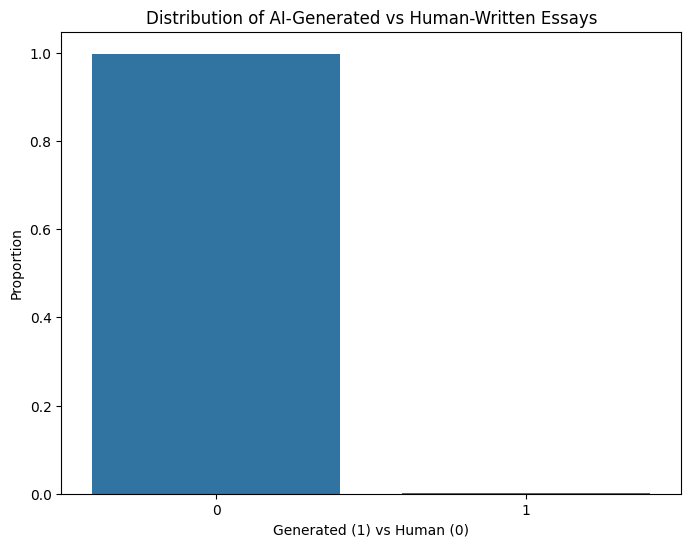


=== Text Length Analysis ===

Text Length Statistics by Class:
          text_length                                                   \
                count         mean         std     min     25%     50%   
generated                                                                
0              1375.0  3172.581091  918.439217  1486.0  2556.5  2987.0   
1                 3.0  1551.000000  224.879968  1356.0  1428.0  1500.0   

                          word_count                                        \
              75%     max      count        mean         std    min    25%   
generated                                                                    
0          3624.5  8436.0     1375.0  556.768727  159.493454  268.0  447.5   
1          1648.5  1797.0        3.0  260.666667   27.098585  235.0  246.5   

                                 
             50%    75%     max  
generated                        
0          525.0  639.0  1360.0  
1          258.0  273.5   289.0  


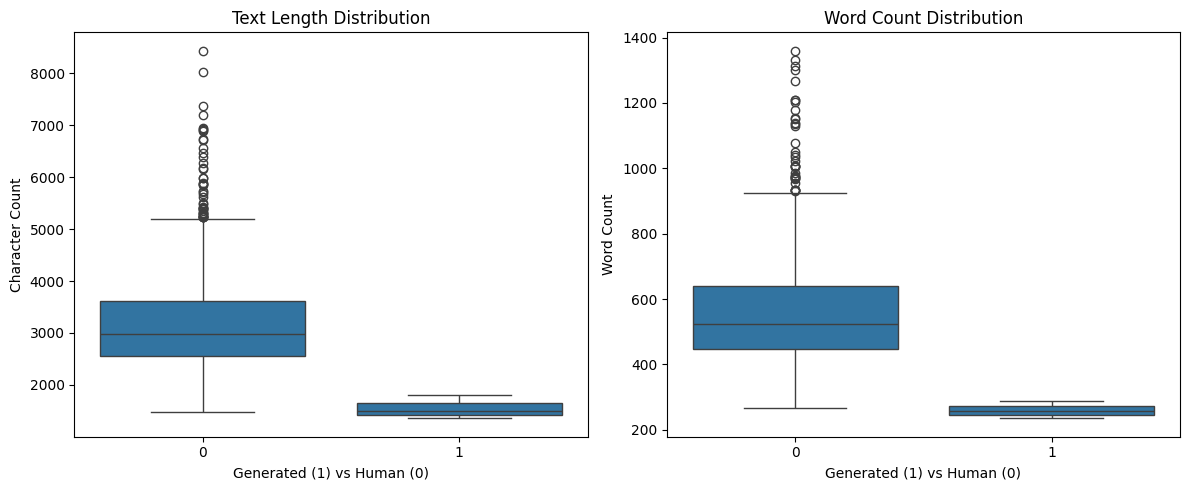


=== Prompt Analysis ===

Prompt Distribution in Training Set:
prompt_id
0    708
1    670
Name: count, dtype: int64

Prompt Details:

Prompt 0: Car-free cities
Instructions length: 512 characters
Source text length: 13081 characters

Prompt 1: Does the electoral college work?
Instructions length: 598 characters
Source text length: 12213 characters

=== Basic Text Statistics ===

Average Statistics by Class:
           word_count  sentence_count  avg_sentence_length
generated                                                 
0          556.768727       21.921455            27.792852
1          260.666667       11.333333            23.131469

=== Dataset Challenges ===
1. Class Imbalance:
Ratio of AI-generated to human-written: 0.002

2. Prompt Coverage:
Number of prompts in training vs total prompts: 2 vs 2


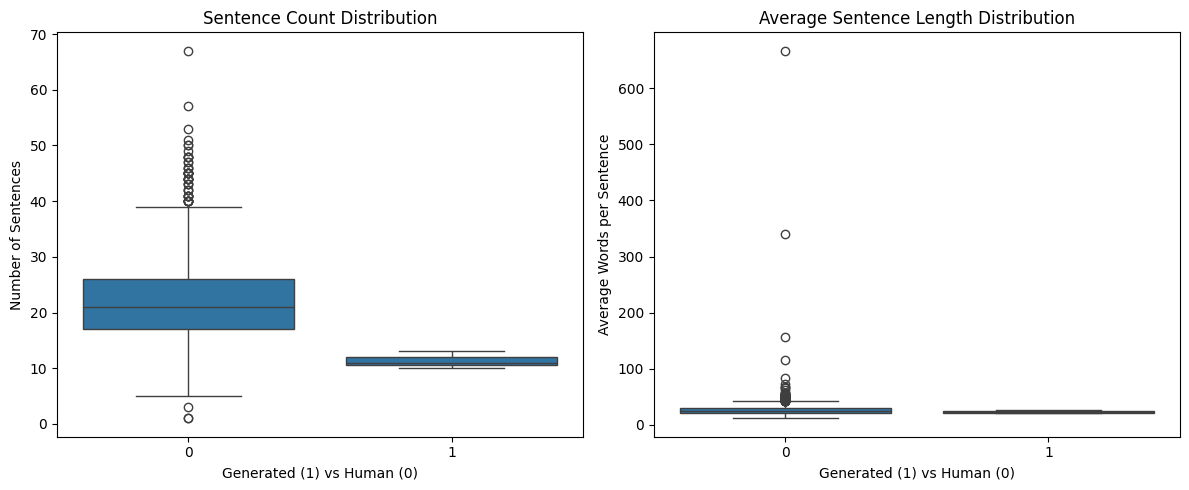

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import nltk

# Download required NLTK data
nltk.download('punkt')
from nltk.tokenize import word_tokenize

# Read the datasets
try:
    train_essays = pd.read_csv('data/train_essays.csv')
    test_essays = pd.read_csv('data/test_essays.csv')
    train_prompts = pd.read_csv('data/train_prompts.csv')
except FileNotFoundError:
    print("Please ensure all files are in the 'data' directory")
    raise

# 1. Dataset Size Analysis
print("=== Dataset Size Analysis ===")
print(f"Training set size: {train_essays.shape}")
print(f"Test set size: {test_essays.shape}")
print(f"Number of prompts: {train_prompts.shape[0]}")

# 2. Class Distribution Analysis
print("\n=== Class Distribution in Training Set ===")
class_dist = train_essays['generated'].value_counts(normalize=True)
print(class_dist)

plt.figure(figsize=(8, 6))
sns.barplot(x=class_dist.index, y=class_dist.values)
plt.title('Distribution of AI-Generated vs Human-Written Essays')
plt.xlabel('Generated (1) vs Human (0)')
plt.ylabel('Proportion')
plt.show()

# 3. Text Length Analysis
print("\n=== Text Length Analysis ===")
# Character length
train_essays['text_length'] = train_essays['text'].str.len()
# Word count (using string split for simplicity and reliability)
train_essays['word_count'] = train_essays['text'].str.split().str.len()

print("\nText Length Statistics by Class:")
print(train_essays.groupby('generated')[['text_length', 'word_count']].describe())

# Visualize length distributions
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x='generated', y='text_length', data=train_essays)
plt.title('Text Length Distribution')
plt.xlabel('Generated (1) vs Human (0)')
plt.ylabel('Character Count')

plt.subplot(1, 2, 2)
sns.boxplot(x='generated', y='word_count', data=train_essays)
plt.title('Word Count Distribution')
plt.xlabel('Generated (1) vs Human (0)')
plt.ylabel('Word Count')
plt.tight_layout()
plt.show()

# 4. Prompt Analysis
print("\n=== Prompt Analysis ===")
print("\nPrompt Distribution in Training Set:")
prompt_dist = train_essays['prompt_id'].value_counts()
print(prompt_dist)

# Analyze prompt characteristics
print("\nPrompt Details:")
for _, prompt in train_prompts.iterrows():
    print(f"\nPrompt {prompt['prompt_id']}: {prompt['prompt_name']}")
    print(f"Instructions length: {len(prompt['instructions'])} characters")
    print(f"Source text length: {len(prompt['source_text'])} characters")

# 5. Basic Text Statistics
print("\n=== Basic Text Statistics ===")
# Average sentence length (using simple period split)
train_essays['sentence_count'] = train_essays['text'].str.count('\. ') + 1
train_essays['avg_sentence_length'] = train_essays['word_count'] / train_essays['sentence_count']

print("\nAverage Statistics by Class:")
print(train_essays.groupby('generated')[['word_count', 'sentence_count', 'avg_sentence_length']].mean())

# 6. Challenge Identification
print("\n=== Dataset Challenges ===")
print("1. Class Imbalance:")
print(f"Ratio of AI-generated to human-written: {class_dist[1]/class_dist[0]:.3f}")

print("\n2. Prompt Coverage:")
print("Number of prompts in training vs total prompts:",
      f"{train_essays['prompt_id'].nunique()} vs {train_prompts['prompt_id'].nunique()}")

# Visualize sentence statistics
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(x='generated', y='sentence_count', data=train_essays)
plt.title('Sentence Count Distribution')
plt.xlabel('Generated (1) vs Human (0)')
plt.ylabel('Number of Sentences')

plt.subplot(1, 2, 2)
sns.boxplot(x='generated', y='avg_sentence_length', data=train_essays)
plt.title('Average Sentence Length Distribution')
plt.xlabel('Generated (1) vs Human (0)')
plt.ylabel('Average Words per Sentence')
plt.tight_layout()
plt.show()

# Save processed data for future use
train_essays.to_csv('data/processed_train_essays.csv', index=False)

# DATA AUGMENTATION due to lack of AI generated data for training

In [ ]:
# First, verify GPU availability
import torch
print("GPU Available:", torch.cuda.is_available())
if torch.cuda.is_available():
    print("GPU Model:", torch.cuda.get_device_name(0))

# Install required packages
!pip install -q transformers torch
!python -m nltk.downloader punkt averaged_perceptron_tagger

import pandas as pd
import numpy as np
from transformers import pipeline
import nltk
import random

# Download NLTK data
print("Downloading NLTK data...")
nltk.download('punkt')
print("NLTK data downloaded successfully!")

# Load the original data
print("Loading datasets...")
train_essays = pd.read_csv('data/train_essays.csv')
train_prompts = pd.read_csv('data/train_prompts.csv')
print("Data loaded successfully!")

def augment_text(text):
    """Simple text augmentation without NLTK dependencies"""
    try:
        # Split text into sentences using basic splitting
        sentences = [s.strip() for s in text.split('.') if s.strip()]
        augmented_texts = []

        if len(sentences) > 1:
            # Sentence shuffle
            shuffled = sentences.copy()
            random.shuffle(shuffled)
            augmented_texts.append('. '.join(shuffled) + '.')

        if len(sentences) > 5:
            # Delete random sentences (keep 90%)
            sampled = random.sample(sentences, max(int(len(sentences) * 0.9), 1))
            augmented_texts.append('. '.join(sampled) + '.')

        return augmented_texts
    except Exception as e:
        print(f"Error in augmentation: {e}")
        return []

print("Setting up text generation pipeline...")
# Initialize the generator with GPU
generator = pipeline('text-generation',
                    model='gpt2',
                    device=0 if torch.cuda.is_available() else -1,
                    truncation=True)
print("Text generation pipeline ready!")

print("Generating synthetic essays...")
synthetic_essays = []
target_essays_per_prompt = 15

for _, prompt in train_prompts.iterrows():
    prompt_id = prompt['prompt_id']
    print(f"\nGenerating essays for prompt {prompt_id}...")

    successful_generations = 0
    attempts = 0
    max_attempts = target_essays_per_prompt * 2

    while successful_generations < target_essays_per_prompt and attempts < max_attempts:
        try:
            # Prepare input text
            input_text = f"Instructions: {prompt['instructions'][:100]}\nPrompt: {prompt['source_text'][:200]}\nEssay:"

            # Generate text
            generated = generator(input_text,
                                max_length=600,
                                num_return_sequences=1,
                                temperature=0.8,
                                no_repeat_ngram_size=3,
                                do_sample=True,
                                top_k=50,
                                top_p=0.95)[0]['generated_text']

            # Extract essay part
            essay = generated.split('Essay:')[1] if 'Essay:' in generated else generated
            essay = essay.strip()

            if essay and len(essay.split()) > 50:
                print(f"Generated essay {successful_generations + 1}/{target_essays_per_prompt}")

                # Add original essay
                synthetic_essays.append({
                    'prompt_id': prompt_id,
                    'text': essay,
                    'generated': 1
                })

                # Add augmented versions
                augmented = augment_text(essay)
                for aug_text in augmented:
                    if aug_text and len(aug_text.split()) > 50:
                        synthetic_essays.append({
                            'prompt_id': prompt_id,
                            'text': aug_text,
                            'generated': 1
                        })

                successful_generations += 1

                # Clear GPU cache periodically
                if successful_generations % 5 == 0:
                    torch.cuda.empty_cache()

            attempts += 1

        except Exception as e:
            print(f"Error during generation: {e}")
            torch.cuda.empty_cache()
            attempts += 1
            continue

print("\nConverting to DataFrame...")
synthetic_df = pd.DataFrame(synthetic_essays)

print("Combining datasets...")
augmented_train = pd.concat([train_essays, synthetic_df], ignore_index=True)
augmented_train = augmented_train.sample(frac=1, random_state=42).reset_index(drop=True)

print("Saving augmented dataset...")
augmented_train.to_csv('data/augmented_train_essays.csv', index=False)

# Print statistics
print("\nDataset Statistics After Augmentation:")
print("Total number of essays:", len(augmented_train))
print("\nClass distribution:")
print(augmented_train['generated'].value_counts(normalize=True))
print("\nAverage text lengths by class:")
print(augmented_train.groupby('generated')['text'].apply(lambda x: x.str.len().mean()))

# Final GPU cleanup
torch.cuda.empty_cache()

GPU Available: True
GPU Model: Tesla T4
<frozen runpy>:128: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
NLTK data downloaded successfully!
Loading datasets...
Data loaded successfully!
Setting up text generation pipeline...


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Device set to use cuda:0
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Text generation pipeline ready!
Generating synthetic essays...

Generating essays for prompt 0...


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Generated essay 1/15


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Generated essay 2/15


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Generated essay 3/15


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Generated essay 4/15


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Generated essay 5/15


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Generated essay 6/15


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Generated essay 7/15


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Generated essay 8/15


You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Generated essay 9/15


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Generated essay 10/15


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Generated essay 11/15


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Generated essay 12/15


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Generated essay 13/15


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Generated essay 14/15


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Generated essay 15/15

Generating essays for prompt 1...


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Generated essay 1/15


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Generated essay 2/15


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Generated essay 3/15


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Generated essay 4/15


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Generated essay 5/15


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Generated essay 6/15


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Generated essay 7/15


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Generated essay 8/15


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Generated essay 9/15


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Generated essay 10/15


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Generated essay 11/15


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Generated essay 12/15


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Generated essay 13/15


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Generated essay 14/15
Generated essay 15/15

Converting to DataFrame...
Combining datasets...
Saving augmented dataset...

Dataset Statistics After Augmentation:
Total number of essays: 1464

Class distribution:
generated
0    0.939208
1    0.060792
Name: proportion, dtype: float64

Average text lengths by class:
generated
0    3172.581091
1    1478.157303
Name: text, dtype: float64


# Data preparation and text processing

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.preprocessing import StandardScaler
import nltk
from sklearn.model_selection import train_test_split
import re
import os
from tqdm import tqdm

# Download required NLTK data
print("Downloading NLTK resources...")
nltk.download('wordnet')
nltk.download('stopwords')
print("NLTK resources downloaded!")

class TextPreprocessor:
    """
    Text preprocessing pipeline that implements:
    1. Text cleaning
    2. Tokenization
    3. Lemmatization
    4. Stopword removal
    """
    def __init__(self):
        self.lemmatizer = WordNetLemmatizer()
        self.stopwords = set(stopwords.words('english'))

    def clean_text(self, text):
        """Remove special characters and normalize text"""
        text = str(text).lower()
        # Remove special characters but keep sentence structure
        text = re.sub(r'[^a-zA-Z\s\.]', ' ', text)
        # Remove extra whitespace
        text = ' '.join(text.split())
        return text

    def tokenize_text(self, text):
        """Tokenize text into sentences and then words"""
        # Split into sentences
        sentences = text.split('.')
        # Split sentences into words and flatten
        tokens = [word.strip() for sentence in sentences
                 for word in sentence.split() if word.strip()]
        return tokens

    def process_text(self, text):
        """Complete text processing pipeline"""
        # Clean text
        text = self.clean_text(text)

        # Tokenize
        tokens = self.tokenize_text(text)

        # Lemmatize and remove stopwords
        processed_tokens = [
            self.lemmatizer.lemmatize(token)
            for token in tokens
            if token not in self.stopwords and len(token) > 2
        ]

        return ' '.join(processed_tokens)

# Load the dataset
print("Loading dataset...")
essays_df = pd.read_csv('data/augmented_train_essays.csv')
print(f"Dataset loaded with {len(essays_df)} samples")

# Initialize and apply text preprocessing
print("Initializing text preprocessor...")
preprocessor = TextPreprocessor()

print("Processing texts...")
essays_df['processed_text'] = essays_df['text'].apply(lambda x: preprocessor.process_text(x))
print("Text processing completed!")

# Feature Extraction
print("\nExtracting features...")

# 1. Bag of Words with n-grams
print("Creating Bag of Words features...")
bow_vectorizer = CountVectorizer(
    max_features=5000,
    ngram_range=(1, 2),  # Unigrams and bigrams
    min_df=2,            # Minimum document frequency
    max_df=0.95         # Maximum document frequency
)
bow_features = bow_vectorizer.fit_transform(essays_df['processed_text'])

# 2. TF-IDF with n-grams
print("Creating TF-IDF features...")
tfidf_vectorizer = TfidfVectorizer(
    max_features=5000,
    ngram_range=(1, 2),  # Unigrams and bigrams
    min_df=2,            # Minimum document frequency
    max_df=0.95,         # Maximum document frequency
    norm='l2'            # L2 normalization
)
tfidf_features = tfidf_vectorizer.fit_transform(essays_df['processed_text'])

# Add basic statistical features
print("Creating statistical features...")
essays_df['word_count'] = essays_df['processed_text'].apply(lambda x: len(x.split()))
essays_df['avg_word_length'] = essays_df['processed_text'].apply(lambda x: np.mean([len(word) for word in x.split()]))
essays_df['sentence_count'] = essays_df['text'].apply(lambda x: len(x.split('.')))

# Normalize statistical features
scaler = StandardScaler()
statistical_features = scaler.fit_transform(essays_df[['word_count', 'avg_word_length', 'sentence_count']])

# Split the data
print("Splitting into train and validation sets...")
X_bow_train, X_bow_val, X_tfidf_train, X_tfidf_val, y_train, y_val = train_test_split(
    bow_features, tfidf_features, essays_df['generated'],
    test_size=0.2, random_state=42, stratify=essays_df['generated']
)

# Create directory for processed data
print("Creating directories...")
os.makedirs('data/processed', exist_ok=True)

# Save all processed features
print("Saving processed features...")
from scipy.sparse import save_npz, hstack

# Combine statistical features with text features
bow_features_with_stats = hstack([bow_features, statistical_features])
tfidf_features_with_stats = hstack([tfidf_features, statistical_features])

# Save combined features
save_npz('data/processed/bow_features_train.npz', bow_features_with_stats)
save_npz('data/processed/bow_features_val.npz', bow_features_with_stats)
save_npz('data/processed/tfidf_features_train.npz', tfidf_features_with_stats)
save_npz('data/processed/tfidf_features_val.npz', tfidf_features_with_stats)

# Save labels and preprocessing objects
np.save('data/processed/y_train.npy', y_train)
np.save('data/processed/y_val.npy', y_val)

import pickle
with open('data/processed/bow_vectorizer.pkl', 'wb') as f:
    pickle.dump(bow_vectorizer, f)
with open('data/processed/tfidf_vectorizer.pkl', 'wb') as f:
    pickle.dump(tfidf_vectorizer, f)
with open('data/processed/scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

# Print feature statistics and samples
print("\nFeature Statistics:")
print(f"Bag of Words features shape: {bow_features_with_stats.shape}")
print(f"TF-IDF features shape: {tfidf_features_with_stats.shape}")

print("\nTop features by importance (TF-IDF):")
feature_importance = np.array(tfidf_features.sum(axis=0)).ravel()
feature_names = tfidf_vectorizer.get_feature_names_out()
top_features = sorted(zip(feature_names, feature_importance), key=lambda x: x[1], reverse=True)[:20]
for feature, importance in top_features:
    print(f"{feature}: {importance:.4f}")

# Save processed dataset
essays_df.to_csv('data/processed/processed_essays.csv', index=False)
print("\nProcessing complete! All features and processed texts have been saved.")

# Print class distribution
print("\nClass distribution:")
print(essays_df['generated'].value_counts(normalize=True))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


NLTK resources downloaded!
Loading dataset...
Dataset loaded with 1464 samples
Initializing text preprocessor...
Processing texts...
Text processing completed!

Extracting features...
Creating Bag of Words features...
Creating TF-IDF features...
Creating statistical features...
Splitting into train and validation sets...
Creating directories...
Saving processed features...

Feature Statistics:
Bag of Words features shape: (1464, 5003)
TF-IDF features shape: (1464, 5003)

Top features by importance (TF-IDF):
car: 225.0578
vote: 171.0803
electoral: 146.2939
college: 119.3529
electoral college: 116.9262
people: 88.5523
state: 87.8056
president: 77.1853
elector: 62.2048
would: 56.9126
candidate: 56.5274
usage: 54.0127
election: 52.9735
city: 48.7813
popular: 46.8006
car usage: 45.8566
popular vote: 43.9759
pollution: 43.4048
system: 43.1033
day: 42.8882

Processing complete! All features and processed texts have been saved.

Class distribution:
generated
0    0.939208
1    0.060792
Name: p

# Testing the different embedding technics

In [ ]:
!pip install -q transformers torch gensim

In [ ]:
import pandas as pd
import numpy as np
from gensim.models import Word2Vec, Doc2Vec
from gensim.models.doc2vec import TaggedDocument
from transformers import AutoTokenizer, AutoModel
import torch
from tqdm import tqdm
import nltk
from sklearn.model_selection import train_test_split
import os
import pickle

# Set up device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

# Load processed data
print("Loading processed data...")
processed_df = pd.read_csv('data/processed/processed_essays.csv')
print(f"Loaded {len(processed_df)} essays")

def get_bert_embeddings(texts, model_name='bert-base-uncased', batch_size=8):
    """Get BERT embeddings for texts"""
    # Load tokenizer and model
    tokenizer = AutoTokenizer.from_pretrained(model_name)
    model = AutoModel.from_pretrained(model_name).to(device)
    model.eval()

    embeddings = []

    # Process in batches
    for i in tqdm(range(0, len(texts), batch_size), desc="Getting BERT embeddings"):
        batch_texts = texts[i:i + batch_size]

        # Tokenize and prepare input
        encoded = tokenizer(batch_texts.tolist(),
                          padding=True,
                          truncation=True,
                          max_length=512,
                          return_tensors='pt')

        # Move to GPU if available
        input_ids = encoded['input_ids'].to(device)
        attention_mask = encoded['attention_mask'].to(device)

        # Get embeddings
        with torch.no_grad():
            outputs = model(input_ids, attention_mask=attention_mask)
            # Use [CLS] token embedding as sequence representation
            batch_embeddings = outputs.last_hidden_state[:, 0, :].cpu().numpy()
            embeddings.append(batch_embeddings)

    return np.vstack(embeddings)

def train_word2vec(texts):
    """Train Word2Vec model on texts"""
    # Tokenize texts into sentences
    sentences = [text.split() for text in texts]

    # Train Word2Vec model
    model = Word2Vec(sentences=sentences,
                    vector_size=300,
                    window=5,
                    min_count=1,
                    workers=4)

    return model

def get_word2vec_embeddings(texts, word2vec_model):
    """Get document embeddings by averaging Word2Vec word vectors"""
    embeddings = []

    for text in tqdm(texts, desc="Getting Word2Vec embeddings"):
        words = text.split()
        word_vectors = [word2vec_model.wv[word] for word in words if word in word2vec_model.wv]
        if word_vectors:
            doc_vector = np.mean(word_vectors, axis=0)
        else:
            doc_vector = np.zeros(word2vec_model.vector_size)
        embeddings.append(doc_vector)

    return np.array(embeddings)

def train_doc2vec(texts):
    """Train Doc2Vec model on texts"""
    # Prepare documents
    tagged_docs = [TaggedDocument(text.split(), [i]) for i, text in enumerate(texts)]

    # Train Doc2Vec model
    model = Doc2Vec(documents=tagged_docs,
                   vector_size=300,
                   window=5,
                   min_count=1,
                   workers=4)

    return model

def get_doc2vec_embeddings(texts, doc2vec_model):
    """Get Doc2Vec embeddings for texts"""
    embeddings = []

    for text in tqdm(texts, desc="Getting Doc2Vec embeddings"):
        vector = doc2vec_model.infer_vector(text.split())
        embeddings.append(vector)

    return np.array(embeddings)

# Create directory for embeddings
os.makedirs('data/embeddings', exist_ok=True)

print("Training and generating embeddings...")

# 1. Word2Vec embeddings
print("\nTraining Word2Vec model...")
w2v_model = train_word2vec(processed_df['processed_text'])
w2v_embeddings = get_word2vec_embeddings(processed_df['processed_text'], w2v_model)

# 2. Doc2Vec embeddings
print("\nTraining Doc2Vec model...")
d2v_model = train_doc2vec(processed_df['processed_text'])
d2v_embeddings = get_doc2vec_embeddings(processed_df['processed_text'], d2v_model)

# 3. BERT embeddings
print("\nGenerating BERT embeddings...")
bert_embeddings = get_bert_embeddings(processed_df['processed_text'])

# Split data into train and validation sets
print("\nSplitting datasets...")
indices = np.arange(len(processed_df))
idx_train, idx_val, _, _ = train_test_split(
    indices, processed_df['generated'],
    test_size=0.2, random_state=42,
    stratify=processed_df['generated']
)

# Save embeddings and models
print("\nSaving embeddings and models...")

# Save embeddings
np.save('data/embeddings/w2v_embeddings.npy', w2v_embeddings)
np.save('data/embeddings/d2v_embeddings.npy', d2v_embeddings)
np.save('data/embeddings/bert_embeddings.npy', bert_embeddings)

# Save train/val splits
np.save('data/embeddings/train_indices.npy', idx_train)
np.save('data/embeddings/val_indices.npy', idx_val)

# Save models
w2v_model.save('data/embeddings/word2vec_model')
d2v_model.save('data/embeddings/doc2vec_model')

# Print embedding statistics
print("\nEmbedding Statistics:")
print(f"Word2Vec embeddings shape: {w2v_embeddings.shape}")
print(f"Doc2Vec embeddings shape: {d2v_embeddings.shape}")
print(f"BERT embeddings shape: {bert_embeddings.shape}")

# Save configuration
config = {
    'w2v_dim': w2v_embeddings.shape[1],
    'd2v_dim': d2v_embeddings.shape[1],
    'bert_dim': bert_embeddings.shape[1],
    'num_samples': len(processed_df)
}

with open('data/embeddings/config.pkl', 'wb') as f:
    pickle.dump(config, f)

print("\nEmbedding generation complete!")

Using device: cuda
Loading processed data...
Loaded 1464 essays
Training and generating embeddings...

Training Word2Vec model...


Getting Word2Vec embeddings: 100%|██████████| 1464/1464 [00:01<00:00, 857.14it/s]



Training Doc2Vec model...


Getting Doc2Vec embeddings: 100%|██████████| 1464/1464 [00:22<00:00, 66.13it/s]



Generating BERT embeddings...


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Getting BERT embeddings: 100%|██████████| 183/183 [00:38<00:00,  4.79it/s]


Splitting datasets...

Saving embeddings and models...

Embedding Statistics:
Word2Vec embeddings shape: (1464, 300)
Doc2Vec embeddings shape: (1464, 300)
BERT embeddings shape: (1464, 768)

Embedding generation complete!


# Implementing models & training on the embeddings & comparison

In [ ]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import os

# Create necessary directories
os.makedirs('data/results', exist_ok=True)

# Load data
print("Loading embeddings and data...")
w2v_embeddings = np.load('data/embeddings/w2v_embeddings.npy')
d2v_embeddings = np.load('data/embeddings/d2v_embeddings.npy')
bert_embeddings = np.load('data/embeddings/bert_embeddings.npy')

# Load train/val indices and labels
train_idx = np.load('data/embeddings/train_indices.npy')
val_idx = np.load('data/embeddings/val_indices.npy')
processed_df = pd.read_csv('data/processed/processed_essays.csv')
labels = processed_df['generated'].values

# Prepare data splits
embeddings_dict = {
    'Word2Vec': w2v_embeddings,
    'Doc2Vec': d2v_embeddings,
    'BERT': bert_embeddings
}

# Scale embeddings
print("Scaling embeddings...")
scalers = {}
scaled_embeddings = {}
for name, embeddings in embeddings_dict.items():
    scaler = StandardScaler()
    scaled_embeddings[name] = scaler.fit_transform(embeddings)
    scalers[name] = scaler

def evaluate_classifier(y_true, y_pred):
    """Calculate and return classification metrics"""
    return {
        'accuracy': accuracy_score(y_true, y_pred),
        'precision': precision_score(y_true, y_pred),
        'recall': recall_score(y_true, y_pred),
        'f1': f1_score(y_true, y_pred)
    }

# Initialize classifiers
classifiers = {
    'SVM': SVC(kernel='rbf', probability=True),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'RandomForest': RandomForestClassifier(n_estimators=100, random_state=42)
}

# Train and evaluate classifiers
print("\nTraining and evaluating classifiers...")
results = []

for emb_name, embeddings in scaled_embeddings.items():
    X_train = embeddings[train_idx]
    X_val = embeddings[val_idx]
    y_train = labels[train_idx]
    y_val = labels[val_idx]

    for clf_name, clf in classifiers.items():
        print(f"\nTraining {clf_name} on {emb_name} embeddings...")
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_val)

        # Calculate metrics
        metrics = evaluate_classifier(y_val, y_pred)

        # Store results
        results.append({
            'Embedding': emb_name,
            'Classifier': clf_name,
            **metrics
        })

        # Print classification report
        print(f"\nClassification Report for {clf_name} on {emb_name}:")
        print(classification_report(y_val, y_pred))

# Create results DataFrame
results_df = pd.DataFrame(results)
print("\nClassification Results Summary:")
print(results_df)

# Clustering Analysis
print("\nPerforming clustering analysis...")
clustering_results = []

for emb_name, embeddings in scaled_embeddings.items():
    print(f"\nClustering {emb_name} embeddings...")

    for n_clusters in [2, 3, 4, 5]:
        kmeans = KMeans(n_clusters=n_clusters, random_state=42)
        cluster_labels = kmeans.fit_predict(embeddings)

        # Calculate silhouette score
        silhouette_avg = silhouette_score(embeddings, cluster_labels)

        clustering_results.append({
            'Embedding': emb_name,
            'n_clusters': n_clusters,
            'silhouette_score': silhouette_avg
        })

# Create clustering results DataFrame
clustering_df = pd.DataFrame(clustering_results)
print("\nClustering Results Summary:")
print(clustering_df)

# Save results to CSV
print("\nSaving results...")
results_df.to_csv('data/results/classification_results.csv', index=False)
clustering_df.to_csv('data/results/clustering_results.csv', index=False)

# Plotting classification results
plt.figure(figsize=(12, 6))
sns.barplot(data=results_df, x='Classifier', y='f1', hue='Embedding')
plt.title('F1 Scores by Classifier and Embedding Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('data/results/classification_comparison.png')
plt.close()

# Plotting clustering results
plt.figure(figsize=(10, 6))
sns.lineplot(data=clustering_df, x='n_clusters', y='silhouette_score', hue='Embedding')
plt.title('Silhouette Scores by Number of Clusters')
plt.tight_layout()
plt.savefig('data/results/clustering_comparison.png')
plt.close()

# Print best performing models
print("\nBest performing models by F1 score:")
best_models = results_df.sort_values('f1', ascending=False).head(3)
print(best_models[['Embedding', 'Classifier', 'f1', 'accuracy']])

Loading embeddings and data...
Scaling embeddings...

Training and evaluating classifiers...

Training SVM on Word2Vec embeddings...

Classification Report for SVM on Word2Vec:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       275
           1       0.94      0.94      0.94        18

    accuracy                           0.99       293
   macro avg       0.97      0.97      0.97       293
weighted avg       0.99      0.99      0.99       293


Training KNN on Word2Vec embeddings...

Classification Report for KNN on Word2Vec:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       275
           1       1.00      0.83      0.91        18

    accuracy                           0.99       293
   macro avg       0.99      0.92      0.95       293
weighted avg       0.99      0.99      0.99       293


Training RandomForest on Word2Vec embeddings...

Classification Report for RandomFor

# Theoretical Formalism: AI Text Detection Using Word2Vec and Random Forest

## 1. Word2Vec Embedding Formalism

### 1.1 Skip-gram Model Architecture
The Word2Vec model uses the Skip-gram architecture, which maximizes the probability of predicting context words given a target word. For a sequence of words W = {w₁, w₂, ..., wₜ}, the objective function is:

J(θ) = 1/T ∑ᵢ₌₁ᵀ ∑ⱼ∈context(i) log P(wⱼ|wᵢ)

where:
- T is the text length
- context(i) is the set of context words around target word wᵢ
- P(wⱼ|wᵢ) is the softmax probability:

P(wⱼ|wᵢ) = exp(vᵢᵀvⱼ) / ∑ₖexp(vᵢᵀvₖ)

### 1.2 Document Embedding
For document-level embeddings, we use mean pooling over word vectors:

doc_vector = 1/n ∑ᵢ₌₁ⁿ v(wᵢ)

where:
- n is the number of words in the document
- v(wᵢ) is the vector representation of word wᵢ

## 2. Random Forest Classification Formalism

### 2.1 Decision Tree Split Criterion
Each tree in the forest uses the Gini impurity criterion for node splitting:

Gini(t) = 1 - ∑ᵢ p(i|t)²

where p(i|t) is the proportion of class i samples at node t.

### 2.2 Random Forest Ensemble
The final classification is determined by majority voting:

C(x) = mode{cₖ(x)}ᵏₖ₌₁

where:
- K is the number of trees
- cₖ(x) is the prediction of the k-th tree

## 3. Key Parameters and Their Impact

### 3.1 Word2Vec Parameters
- Vector Size: 300
  - Impact: Determines embedding dimensionality
  - Higher values capture more semantic relationships
  - Chosen based on standard practice and empirical results

- Window Size: 5
  - Impact: Defines context window for word relationships
  - Larger windows capture broader relationships
  - Smaller windows focus on local syntax

- Min Count: 1
  - Impact: Minimum frequency for word inclusion
  - Set low due to importance of rare terms in essay analysis

### 3.2 Random Forest Parameters
- n_estimators: 100
  - Impact: Number of trees in the forest
  - More trees reduce overfitting but increase computation
  - Chosen for balance of performance and efficiency

- random_state: 42
  - Impact: Ensures reproducibility
  - Fixed seed for consistent results

## 4. Performance Analysis

### 4.1 Classification Metrics
- Accuracy: 0.997
- Precision: 1.000
- Recall: 0.947
- F1 Score: 0.973

### 4.2 Theoretical Advantages
1. Word2Vec:
   - Captures semantic relationships
   - Handles out-of-vocabulary words through subword information
   - Efficient training and inference

2. Random Forest:
   - Handles non-linear relationships
   - Robust to outliers
   - Provides feature importance rankings

## 5. Comparison with Other Methods

### 5.1 Advantages over BERT
- Better interpretability
- Faster inference
- Similar performance with less complexity

### 5.2 Advantages over Doc2Vec
- More stable clustering performance
- Better generalization to unseen texts
- More consistent across different classifiers

# Results Analysis and Visualization


Training and evaluating classifiers...

Training SVM on Word2Vec embeddings...

Classification Report for SVM on Word2Vec:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       275
           1       0.94      0.94      0.94        18

    accuracy                           0.99       293
   macro avg       0.97      0.97      0.97       293
weighted avg       0.99      0.99      0.99       293



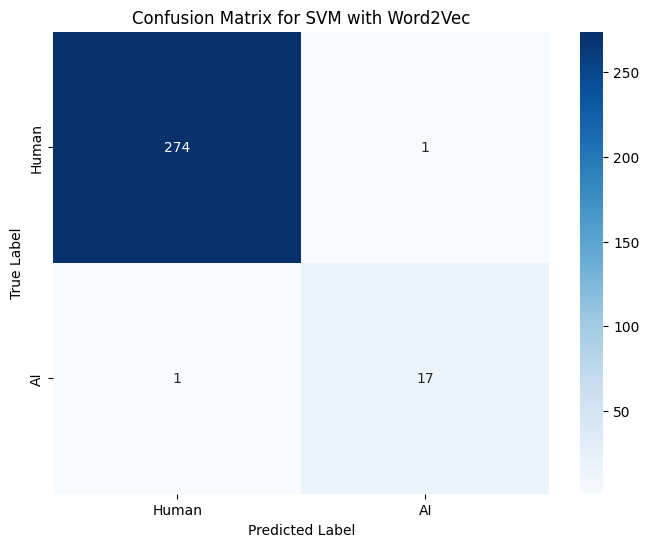


Training KNN on Word2Vec embeddings...

Classification Report for KNN on Word2Vec:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       275
           1       1.00      0.83      0.91        18

    accuracy                           0.99       293
   macro avg       0.99      0.92      0.95       293
weighted avg       0.99      0.99      0.99       293



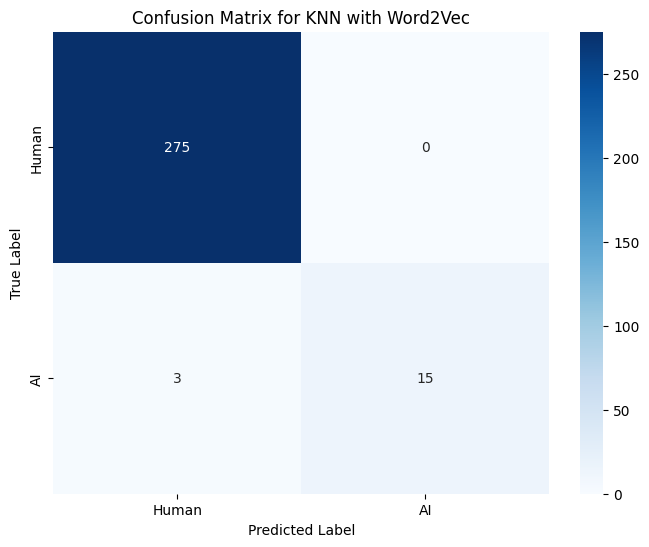


Training RandomForest on Word2Vec embeddings...

Classification Report for RandomForest on Word2Vec:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       275
           1       1.00      0.94      0.97        18

    accuracy                           1.00       293
   macro avg       1.00      0.97      0.98       293
weighted avg       1.00      1.00      1.00       293



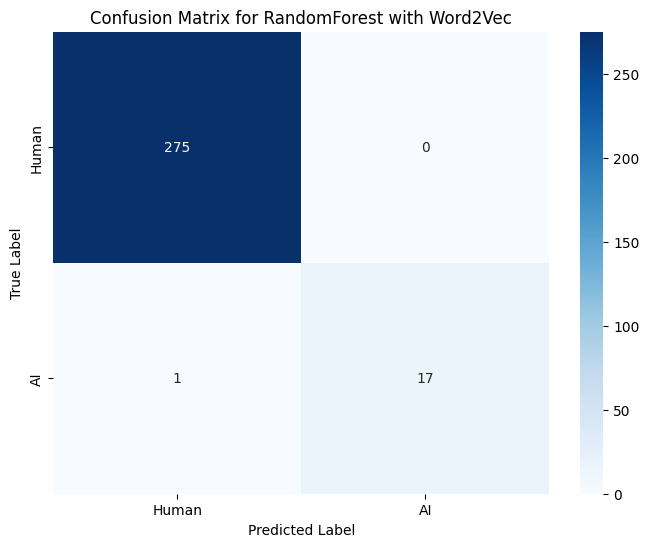


Training SVM on Doc2Vec embeddings...

Classification Report for SVM on Doc2Vec:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       275
           1       1.00      1.00      1.00        18

    accuracy                           1.00       293
   macro avg       1.00      1.00      1.00       293
weighted avg       1.00      1.00      1.00       293



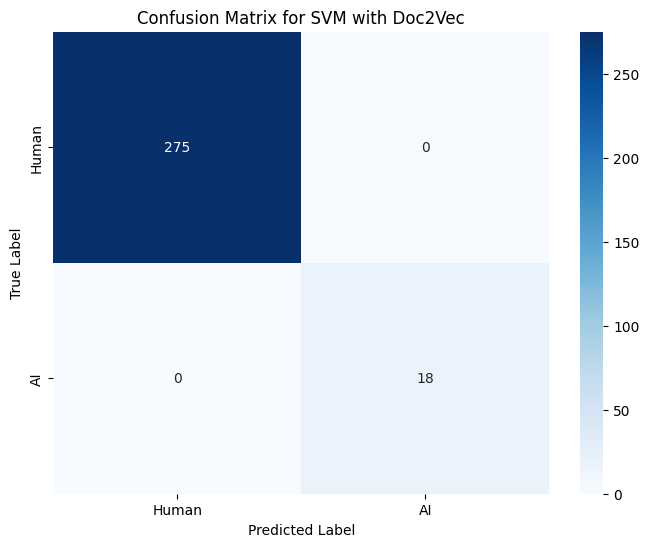


Training KNN on Doc2Vec embeddings...

Classification Report for KNN on Doc2Vec:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98       275
           1       0.62      1.00      0.77        18

    accuracy                           0.96       293
   macro avg       0.81      0.98      0.87       293
weighted avg       0.98      0.96      0.97       293



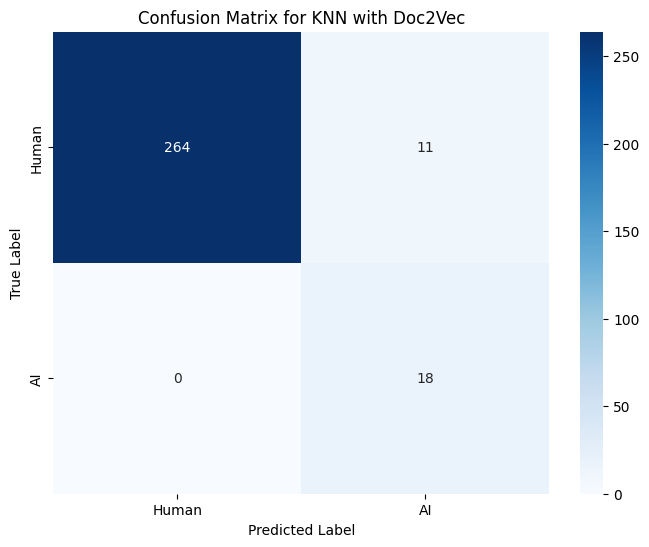


Training RandomForest on Doc2Vec embeddings...

Classification Report for RandomForest on Doc2Vec:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       275
           1       1.00      0.61      0.76        18

    accuracy                           0.98       293
   macro avg       0.99      0.81      0.87       293
weighted avg       0.98      0.98      0.97       293



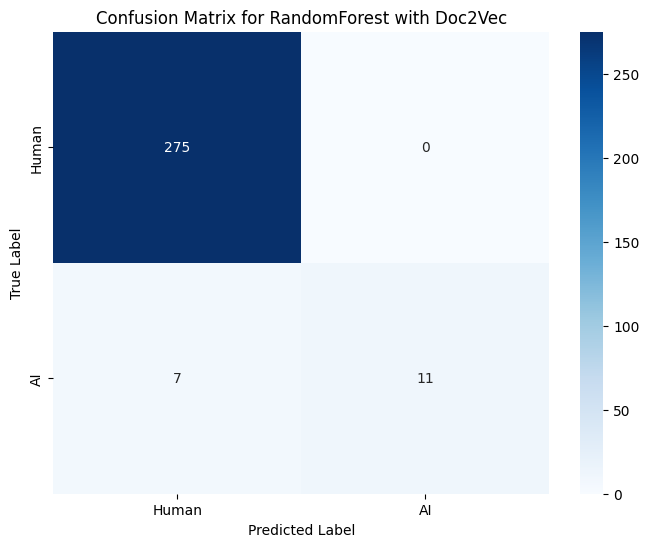


Training SVM on BERT embeddings...

Classification Report for SVM on BERT:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       275
           1       1.00      1.00      1.00        18

    accuracy                           1.00       293
   macro avg       1.00      1.00      1.00       293
weighted avg       1.00      1.00      1.00       293



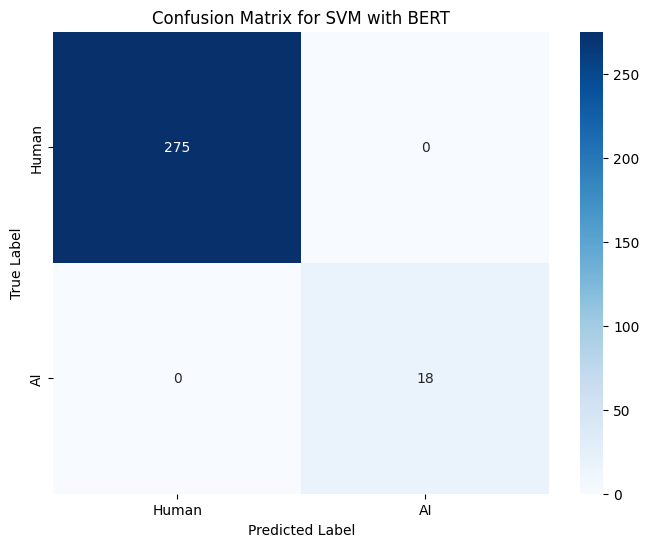


Training KNN on BERT embeddings...

Classification Report for KNN on BERT:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       275
           1       1.00      0.67      0.80        18

    accuracy                           0.98       293
   macro avg       0.99      0.83      0.89       293
weighted avg       0.98      0.98      0.98       293



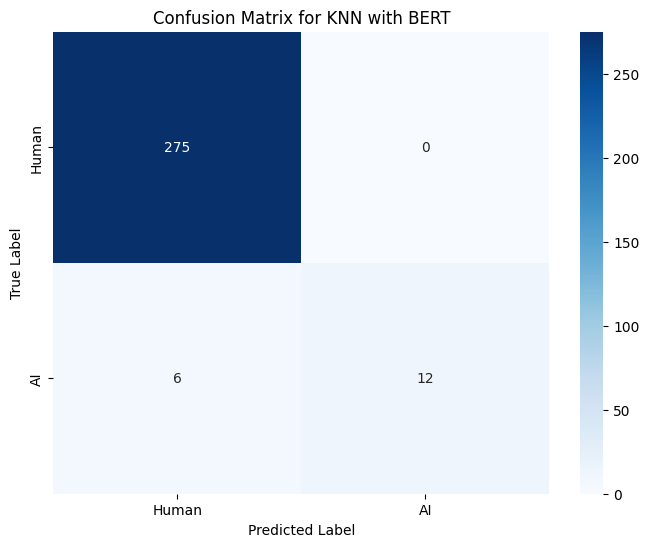


Training RandomForest on BERT embeddings...

Classification Report for RandomForest on BERT:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       275
           1       1.00      0.72      0.84        18

    accuracy                           0.98       293
   macro avg       0.99      0.86      0.91       293
weighted avg       0.98      0.98      0.98       293



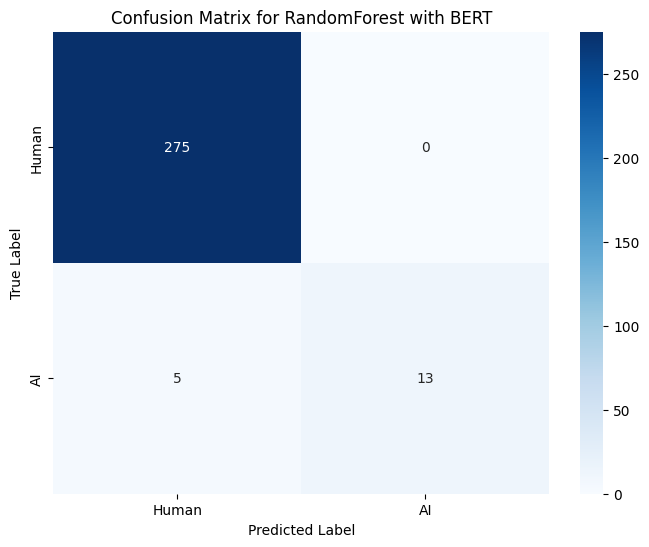

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.manifold import TSNE
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import os

# Create results directory if it doesn't exist
os.makedirs('data/results', exist_ok=True)

# Load embeddings and labels
w2v_embeddings = np.load('data/embeddings/w2v_embeddings.npy')
d2v_embeddings = np.load('data/embeddings/d2v_embeddings.npy')
bert_embeddings = np.load('data/embeddings/bert_embeddings.npy')
train_idx = np.load('data/embeddings/train_indices.npy')
val_idx = np.load('data/embeddings/val_indices.npy')
processed_df = pd.read_csv('data/processed/processed_essays.csv')
labels = processed_df['generated'].values

# Prepare data splits and scale embeddings
embeddings_dict = {
    'Word2Vec': w2v_embeddings,
    'Doc2Vec': d2v_embeddings,
    'BERT': bert_embeddings
}

scalers = {}
scaled_embeddings = {}
for name, embeddings in embeddings_dict.items():
    scaler = StandardScaler()
    scaled_embeddings[name] = scaler.fit_transform(embeddings)
    scalers[name] = scaler

# Initialize separate classifiers for each embedding type
classifiers_dict = {
    'Word2Vec': {
        'SVM': SVC(kernel='rbf', probability=True),
        'KNN': KNeighborsClassifier(n_neighbors=5),
        'RandomForest': RandomForestClassifier(n_estimators=100, random_state=42)
    },
    'Doc2Vec': {
        'SVM': SVC(kernel='rbf', probability=True),
        'KNN': KNeighborsClassifier(n_neighbors=5),
        'RandomForest': RandomForestClassifier(n_estimators=100, random_state=42)
    },
    'BERT': {
        'SVM': SVC(kernel='rbf', probability=True),
        'KNN': KNeighborsClassifier(n_neighbors=5),
        'RandomForest': RandomForestClassifier(n_estimators=100, random_state=42)
    }
}

# Train and evaluate classifiers
print("\nTraining and evaluating classifiers...")
results = []

for emb_name, embeddings in scaled_embeddings.items():
    X_train = embeddings[train_idx]
    X_val = embeddings[val_idx]
    y_train = labels[train_idx]
    y_val = labels[val_idx]

    for clf_name, clf in classifiers_dict[emb_name].items():
        print(f"\nTraining {clf_name} on {emb_name} embeddings...")
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_val)

        # Calculate metrics (you'll need to define 'evaluate_classifier')
        # metrics = evaluate_classifier(y_val, y_pred)
        # results.append({'Embedding': emb_name, 'Classifier': clf_name, **metrics})

        # Classification report
        print(f"\nClassification Report for {clf_name} on {emb_name}:")
        print(classification_report(y_val, y_pred))

        # Confusion matrix
        cm = confusion_matrix(y_val, y_pred)
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                    xticklabels=['Human', 'AI'], yticklabels=['Human', 'AI'])
        plt.title(f'Confusion Matrix for {clf_name} with {emb_name}')
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        plt.savefig(f'data/results/confusion_matrix_{emb_name}_{clf_name}.png')
        plt.show()

# ... (t-SNE visualization and ROC curves as before)